<a href="https://colab.research.google.com/github/Theophine/Machine_Learning/blob/master/Credit_Risk_prediction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
The dataset contains 1000 observations and 10 attributes. Each of the 1000 observations represents a person who takes credit from a bank 
and is thus classified as either a credit risk customer represented by 'bad' or a credit worthy customer represented by 'good'. Therefore the goal of this analysis is; stage 1, to use exploratory visualizations and determine the necessary patterns that indicates whether a customer is not credit worthy or credit worthy and in stage 2, develop a model that can accurately predict the credit worthiness of different customers

#Business Goals

The end goal of this project is to assist the bank determine credit worthy customers from credit unworthy customers so as to gain investors confidence and turn a profit long term.

#Variable Description

Age (numeric)


Sex (text: male, female)


Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)


Housing (text: own, rent, or free)


Saving accounts (text - little, moderate, quite rich, rich)


Checking account (numeric, in DM - Deutsch Mark)


Credit amount (numeric, in DM)


Duration (numeric, in month)


Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others


Risk (Value target - Good or Bad Risk)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [ ]:
import pandas as pd
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['german_credit_data.csv']))

#Import Variables 

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
sns.set(style='darkgrid')

In [ ]:
dataframe.head()

,Age,Sex,job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled employee / official,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled employee / official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled - resident,own,little,NaN,2096,12,education,good
3,45,male,skilled employee / official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee / official,free,little,little,4870,24,car,bad


Analyze the variable

In [ ]:
#create a copy of the original dataframe
df = dataframe.copy()

In [ ]:
df.shape

(1000, 10)

In [ ]:
#check out summary statistics 
df.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


NB: From the above, all the datatypes are okay but then, there are missing values present in the data set especially in savings and checking account.


#Data Wrangling

##Fixing the savings and checking accounts columns

In [ ]:
df['Saving accounts'].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
df['Checking account'].value_counts(dropna = False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Ideally, Fixing missing values in categorical column requires replacing the missing values with the mode. But in order to eliminate bias, I will remove the 'checking account' column since it has more missing values. 




#Data Visualization

##Checking for data imbalance

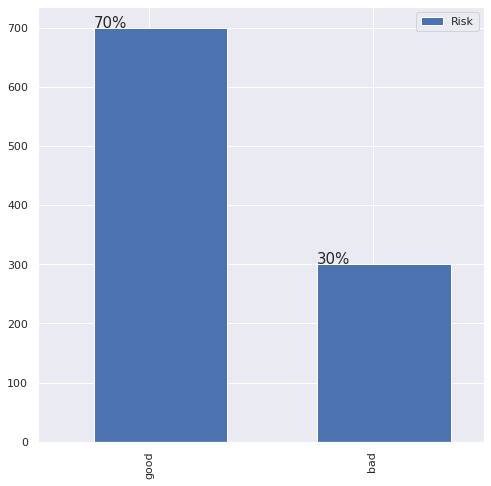

In [ ]:
#Below I will inspect the target variable to check for imbalance
ax = df['Risk'].value_counts().plot.bar();
plt.legend()

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/1000), (x, y + height + 0.3)).set_fontsize(15) 


The above shows that there is data imbalance and this will be fixed before model building. 

##Plot 2: Check the distribution of ages based on the credit risk type 

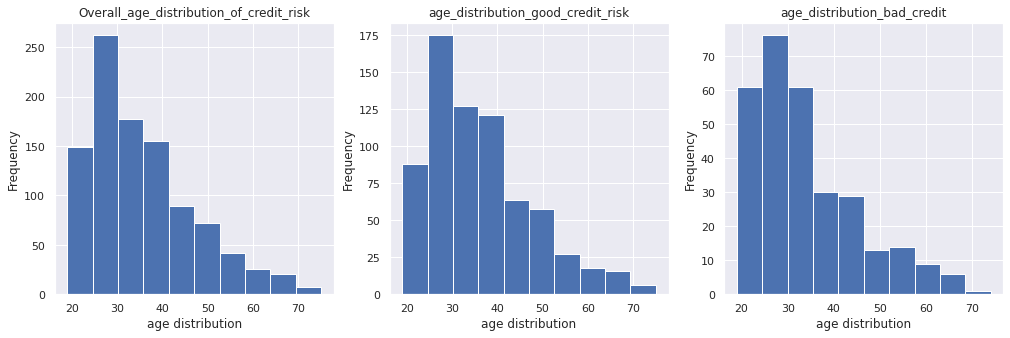

In [ ]:
good_credit = df.query('Risk == "good"')
bad_credit= df.query('Risk == "bad"')

fig, ax = plt.subplots(figsize = (17, 5))

plt.subplot(1, 3, 1)
df['Age'].plot.hist(title = 'Overall_age_distribution_of_credit_risk');
plt.xlabel('age distribution');

plt.subplot(1, 3, 2)
good_credit['Age'].plot.hist(title = 'age_distribution_good_credit_risk')
plt.xlabel('age distribution');

plt.subplot(1, 3, 3)
bad_credit['Age'].plot.hist(title = 'age_distribution_bad_credit')
plt.xlabel('age distribution');

The above 3 histograms show the age distribution. The second histogram shows the age distribution of all customers with only good credit included and 
is shows that customers between the ages of 25 - 30 are the accounts for good credit. 
Based on the next histogram which is histogram of customers with bad credit, customers with ages 25 - 30 are also accounts for bad credits. 

Therefore, it shows that the bulk of the credits were obtained by customers between the ages of 25 - 30. 

plot 3: Next plot is a plot of housing distribution based on the credit risk. Most importantly, the ratio of good to bad risk for all housing types would be the most important metric

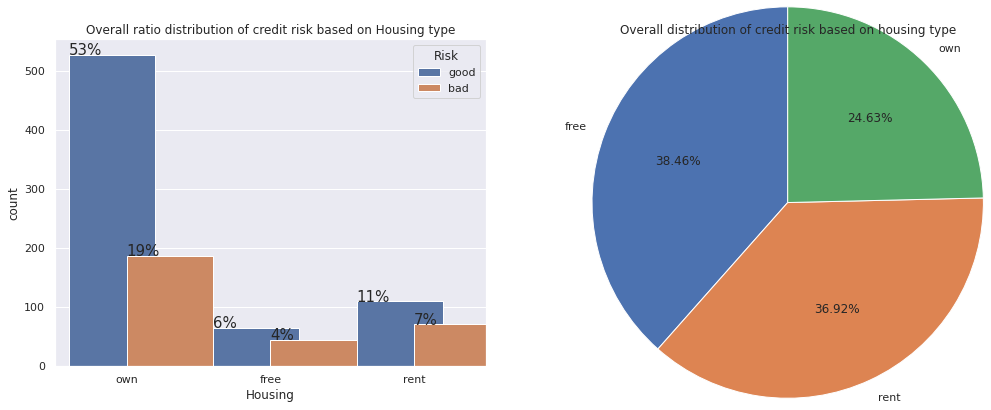

In [ ]:
#Overall distribution of housing type based on risk
fig, ax = plt.subplots(figsize = (17, 6))

plt.subplot(1, 2, 1)
plt.title('Overall ratio distribution of credit risk based on Housing type')
ax = sns.countplot(x = 'Housing', data = df, hue = 'Risk');

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/1000), (x, y + height + 0.3)).set_fontsize(15) 


plt.subplot(1, 2, 2)
housing_ratio = bad_credit.groupby('Housing')['Risk'].count() / df.groupby('Housing')['Risk'].count()
housing_ratio = housing_ratio.reset_index().sort_values(by = 'Risk', ascending = False)
housing_ratio

plt.title('Overall distribution of credit risk based on housing type')
print(' ')
plt.pie(housing_ratio['Risk'], labels = ['free', 'rent', 'own'], startangle = 90, radius =1.5, autopct = '%.2f%%');


Based on the ratio, it can now obvious that people who actually live in a 'free housing' plan are the highest defaulters followed by people who live in 'rented houses'. 
Customers who own their own housing have a higher tendent to not pose a credit risk

Distribution of credit amount based on Sex and distribution of Credit risk based on sex

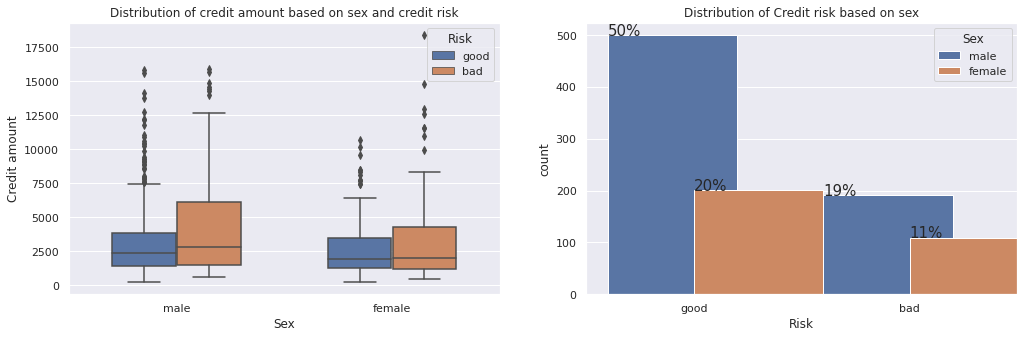

In [ ]:
fig, ax = plt.subplots(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of credit amount based on sex and credit risk')
sns.boxplot(x = 'Sex', y = 'Credit amount', hue = 'Risk', data = df, width = 0.6);

plt.subplot(1, 2, 2)
plt.title('Distribution of Credit risk based on sex')
ax = sns.countplot(x = 'Risk', hue = 'Sex', data = df);

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/1000), (x, y + height + 0.3)).set_fontsize(15) 

Distribution of credit risk based on Job Type

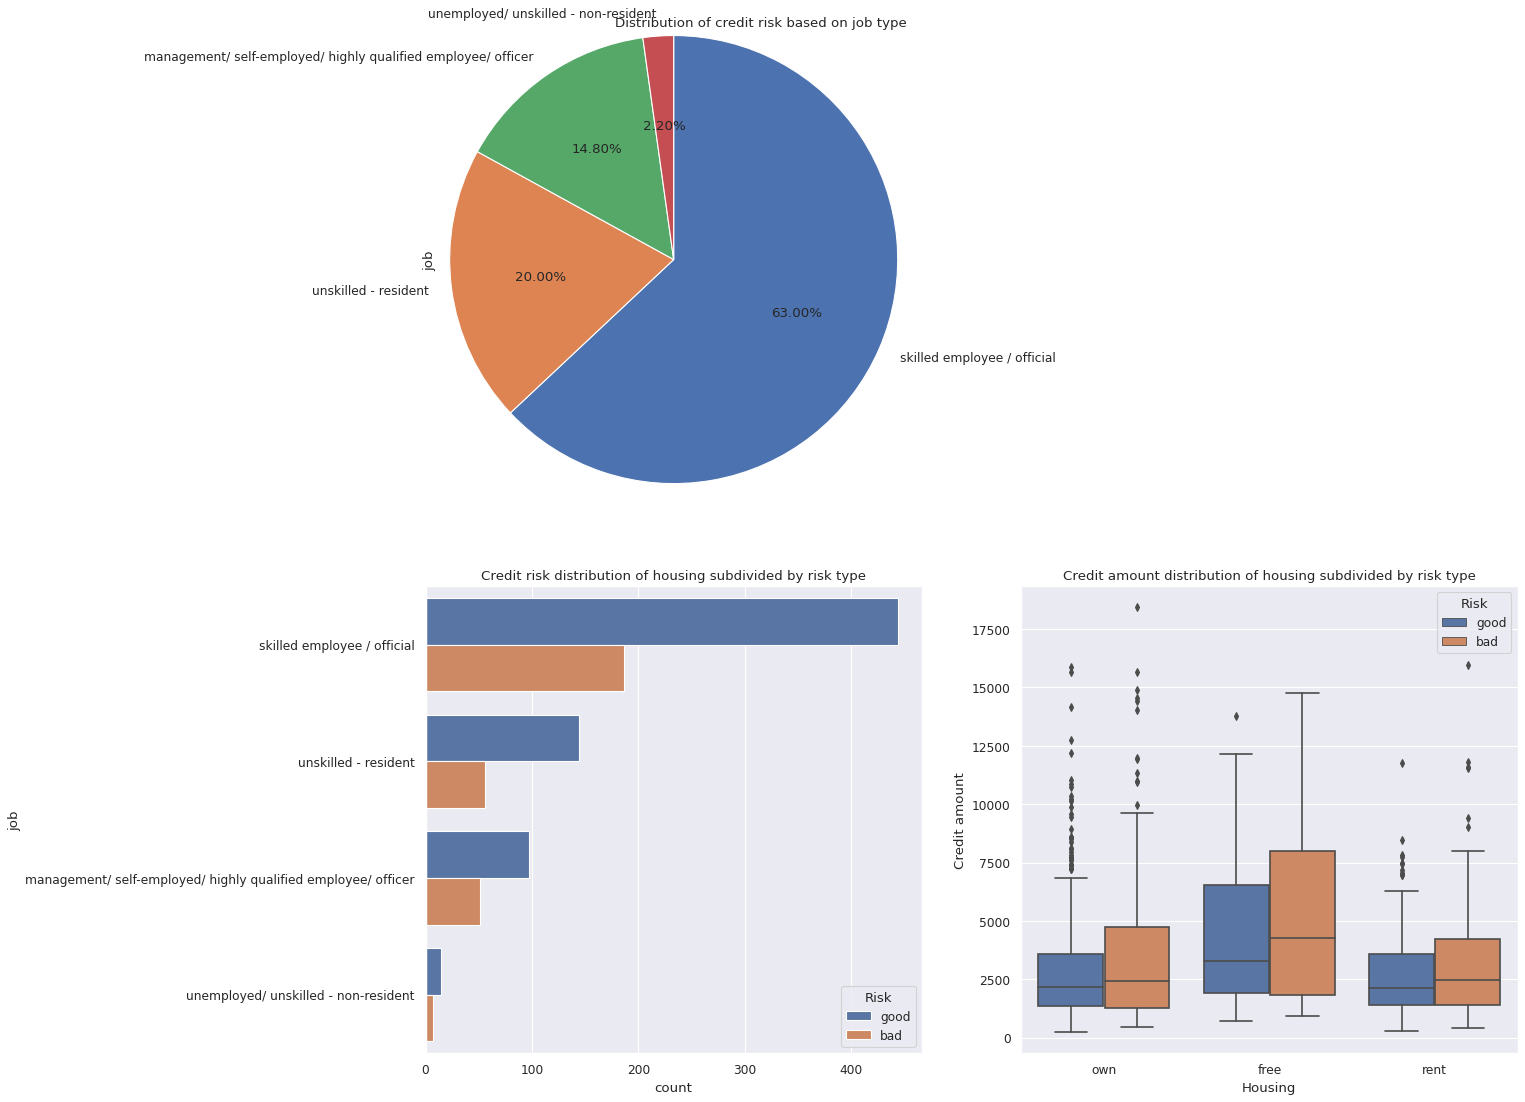

In [ ]:
fig, ax = plt.subplots(figsize = (14, 17), dpi =80)
plt.subplots_adjust(right = 1.1)

plt.subplot(2, 2, 1)
plt.title('Distribution of credit risk based on job type', pad = 0.4, loc = 'right')
df['job'].value_counts().plot.pie(y = 'job', startangle = 90, counterclock = False, autopct = '%.2f%%', radius = 1.2);

plt.subplot(2, 2, 3)
plt.title('Credit risk distribution of housing subdivided by risk type')
sns.countplot(y = 'job', hue = 'Risk', data = df);

plt.subplot(2, 2, 4)
plt.title('Credit amount distribution of housing subdivided by risk type')
sns.boxplot(x = 'Housing', y = 'Credit amount', hue = 'Risk', data = df);

Savings account exploration 

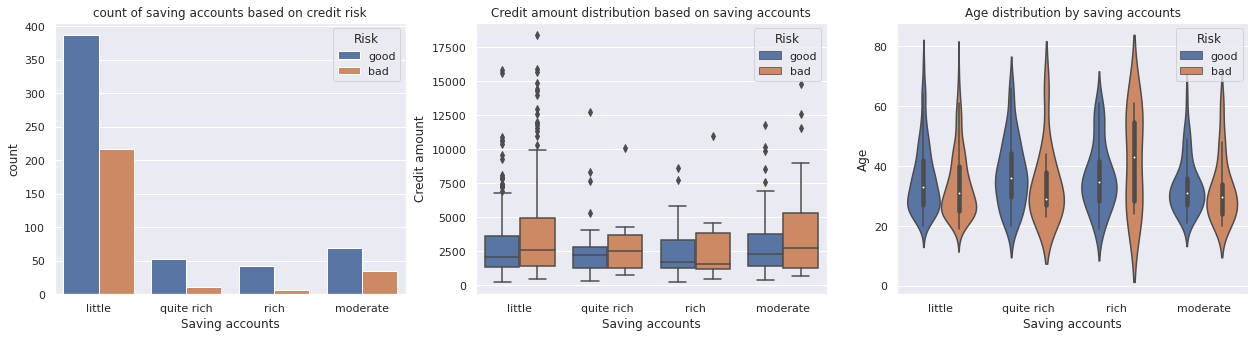

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (17, 5))
plt.subplots_adjust(right = 1.1)

ax[0].set_title('count of saving accounts based on credit risk')
sns.countplot(x = 'Saving accounts', data = df, hue = 'Risk', ax = ax[0]);

ax[1].set_title('Credit amount distribution based on saving accounts')
sns.boxplot(x = 'Saving accounts', y = 'Credit amount', hue = 'Risk', data = df, ax = ax[1]);

plt.title('Age distribution by saving accounts')
sns.violinplot(x = 'Saving accounts', y = 'Age', hue = 'Risk', data = df, ax = ax[2]); 

Distribution of Credit Purpose

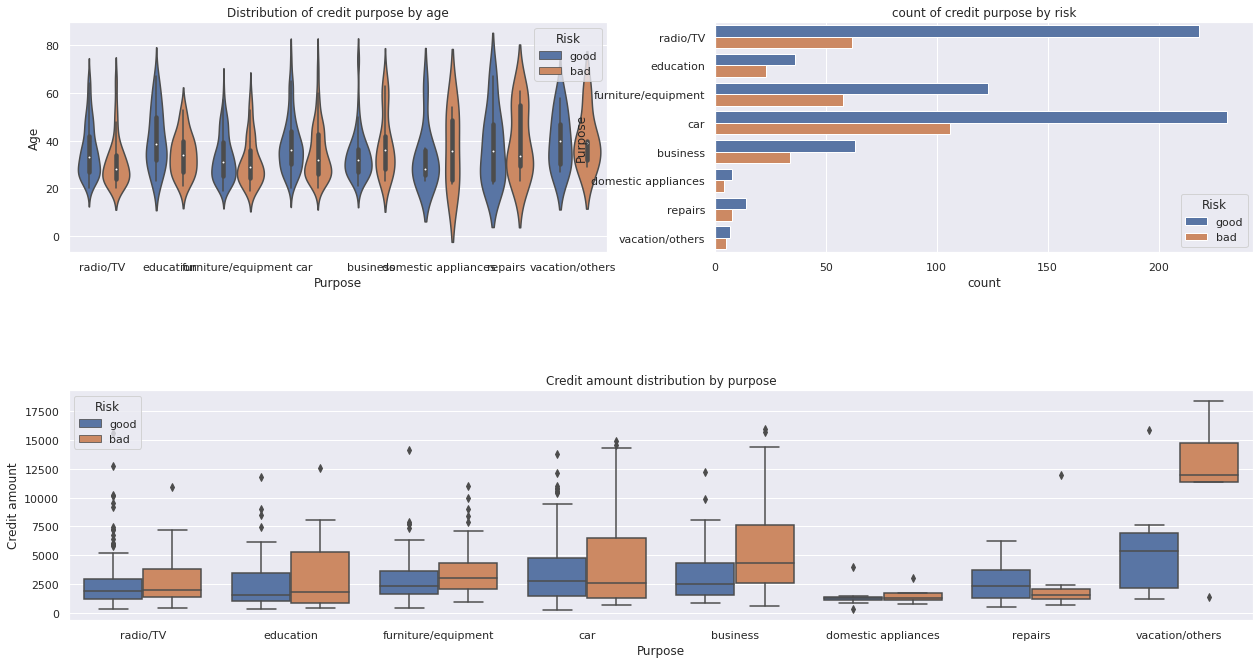

In [ ]:
fig, ax = plt.subplots(figsize = (14, 11))
plt.subplots_adjust(right = 1.3, hspace = 0.6)

plt.subplot(2, 2, 1)
plt.title('Distribution of credit purpose by age')
sns.violinplot(x = 'Purpose', y = 'Age', hue = 'Risk', data = df);

plt.subplot(2, 2, 2)
plt.title('count of credit purpose by risk')
sns.countplot(y = 'Purpose', hue = 'Risk', data = df);

plt.subplot(2, 1, 2)
plt.title('Credit amount distribution by purpose')
sns.boxplot(x = 'Purpose', y = 'Credit amount', hue = 'Risk', data = df);

#Time for feature engineering

First we have to deal with converting categorial varibles into dummy variables 

Fixing the mixing values

Balancing the dataset 

One hot encode the Risk (Target variable) 

In [ ]:
#import all the libraries for model development (scikit_learn)

from sklearn.preprocessing import OneHotEncoder, StandardScaler #for preprocessing the data 
from sklearn.feature_selection import chi2, f_classif, SelectKBest # for feature selection 
from sklearn.impute import SimpleImputer #for dealing with  missing values 
from sklearn.metrics import make_scorer, f1_score #to manipulate the scoring parameter
from sklearn.utils import resample #for balancing the DataConversionWarning
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

#import all the algorithms we will need for this classification 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC


#import libraries for model tuninig 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
#drop the checking account 
df.drop(['Checking account'], axis = 1, inplace = True)

In [ ]:
#Fix the missing values in the Saving accounts and the checking account 
df= df.dropna(subset= ['Saving accounts'], axis = 0)

In [ ]:
#inspect the result
df.shape

(817, 9)

Encode the target variable 

In [ ]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})
df['Risk'].value_counts()

1    549
0    268
Name: Risk, dtype: int64

convert all caategorical variables to dummy

In [ ]:
df_final = pd.get_dummies(df, columns =df.select_dtypes(include = 'object').columns.tolist(), drop_first = True)

#model building stage

In [ ]:
#split the data into Train and Test 
X = df_final.drop(['Risk'], axis = 1).copy()
y = df_final['Risk'].copy()

In [ ]:
#instantiate the model we would love to test
rf = RandomForestClassifier(random_state= 42)
log_reg = LogisticRegression(random_state = 42)
svm = LinearSVC(random_state = 42)
svc  = SVC(random_state = 42)

In [ ]:
#define the scorer and the number of splits 
scorer = make_scorer(f1_score, average = 'weighted')

In [ ]:
k_split = StratifiedKFold(n_splits= 6, shuffle= True)

In [ ]:
#I have 4 models, therefore,I will go use the cross val score to check which would perform best 
def cross_val(model): 
    for model in model: 
        score = np.mean(cross_val_score(model, X, y, cv = k_split, scoring = scorer))
        print('The score of ', model , ' is ', str(score))
        print(' ')
        
models = [rf, log_reg, svm, svc]
cross_val(models)

The score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)  is  0.6717931054118144
 
The score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  is  0.6486676534872999
 
The score of  LinearSVC(C=1.0, class_weight=None, d

From the above, the random forest outperforms all the other algorithms. Therefore, we will build our model with the random forest 

##Decision boundary

The Random forest just like the decision tree works well with both linear and non-linear decision boundaries. but for the sake of know which boundary we are working with, we wil build the decision boundary.

In [ ]:
best_vars = SelectKBest(chi2, k = 6).fit(X, y).get_support()

df_best = pd.DataFrame(X, columns = X.columns[best_vars]).join(y)
df_best.head()

,Age,Credit amount,Duration,Housing_rent,Saving accounts_rich,Purpose_radio/TV,Risk
1,22,5951,48,0,0,1,0
2,49,2096,12,0,0,0,1
3,45,7882,42,0,0,0,1
4,53,4870,24,0,0,0,0
6,53,2835,24,0,0,0,1


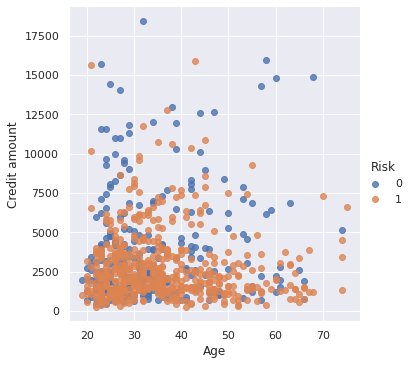

In [ ]:
#checking the decision boundary using the 'age' and 'credit amount'
sns.lmplot('Age', 'Credit amount', hue = 'Risk', data = df_best, fit_reg = False);

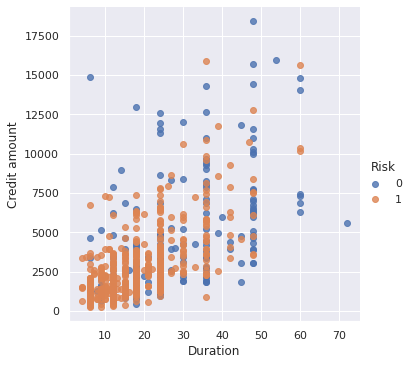

In [ ]:
#checking the decision boundary using the 'duration' and 'credit amount'
sns.lmplot('Duration', 'Credit amount', hue = 'Risk', data = df_best, fit_reg= False);

Based on the above two plots, the decision boundary is non-linear

In [ ]:
X.shape, y.shape

((817, 19), (817,))

##split data into train and test

In [ ]:
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.13, random_state = 42, stratify = y)

In [ ]:
#check the size of the train and test data to make sure that they are equal 
X_train.shape, y_train.shape

((710, 19), (710,))

##Next, we fix the Class Imbalance

In [ ]:
#time for data balancing 
df_sample = pd.concat([X_train, y_train], axis = 1, ignore_index = False)
df_sample.head()

,Age,Credit amount,Duration,Sex_male,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
103,35,1919,9,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
999,27,4576,45,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
6,53,2835,24,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
509,45,8588,39,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
991,34,1569,15,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
#seperate the sample into big and small classes
small_class = df_sample[df_sample['Risk'] == 0]
big_class = df_sample[df_sample['Risk'] == 1]

small_class.shape, big_class.shape

((233, 20), (477, 20))

Below I want to perform downsampling

In [ ]:
downsampled_class = resample(big_class, n_samples = len(small_class), replace = False, random_state = 42)
X_downsample = pd.concat([small_class, downsampled_class], axis = 0)

X_train = X_downsample.drop('Risk', axis = 1)
y_train = X_downsample['Risk']

In [ ]:
#check the result 
X_train.shape, y_train.shape

((466, 19), (466,))

##Creating Pipelines

In [ ]:
scaler = StandardScaler() # to scale our data using standard deviation 
best_vars = SelectKBest(f_classif) # for feature selection
impute = SimpleImputer() # to fix any missing values 
rf = RandomForestClassifier(criterion = 'entropy', random_state= 42, oob_score= True, n_jobs= -1)

In [ ]:
step_rf = [('scale', scaler), ('feature_select', best_vars), ('imputer', impute), ('RF', rf)]

In [ ]:
pipeline = Pipeline(step_rf)


In [ ]:
param = {'feature_select__k': np.arange(1, len(X_train.columns)+1, 1), 'RF__max_depth':[1,3,5,7], 'RF__min_samples_split': [0.1, 0.35, 0.55]}

In [ ]:
#param = {'feature_select__k': np.arange(1, len(X_train.columns)+1, 1),
#         'RF__n_estimators': [100, 150, 200, 250,300, 350, 400],
#                                       'RF__min_samples_split': np.arange(0.1, 1, 0.1),                                     'RF__max_depth': np.arange(1, len(X_train.columns), 1),
#                                       'RF__min_samples_leaf': np.arange(0.1, 1, 0.1), 
#                                       'RF__max_features': np.arange(1, len(X_train.columns), 1),
#                                       'RF__max_depth':np.arange(1, len(X_train.columns), 1)}

In [ ]:
gridsearch = GridSearchCV(pipeline, param_grid = param, cv = k_split, scoring = scorer, return_train_score= True)

In [ ]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('feature_select',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f7c868f6440>)),
                                       ('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      m...
                                               

In [ ]:
gridsearch.best_params_

{'RF__max_depth': 5, 'RF__min_samples_split': 0.1, 'feature_select__k': 3}

In [ ]:
gridsearch.best_estimator_[3].oob_score_

0.6330472103004292

check for overfitting 


In [ ]:
df_cv_result = pd.DataFrame(gridsearch.cv_results_)
np.mean(df_cv_result['mean_train_score']), np.mean(df_cv_result['mean_test_score'])

(0.6689068564085944, 0.6026568083333462)

##model prediction 

In [ ]:
y_pred = gridsearch.predict(X_test)
y_pred_proba = gridsearch.predict_proba(X_test)

##thresholding probability to 0.6 and not the default 0.5

In [ ]:
[s[1] > 0.6 for s in y_pred_proba] == gridsearch.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

Text(0.5, 1.0, 'ROC curve')

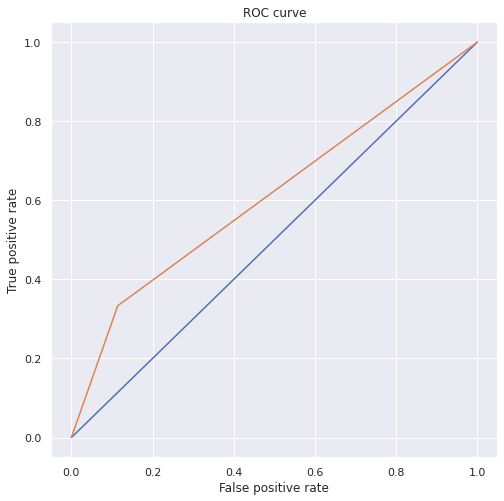

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, [s[1] > 0.6 for s in y_pred_proba])

plt.plot([0, 1], [0, 1]);
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

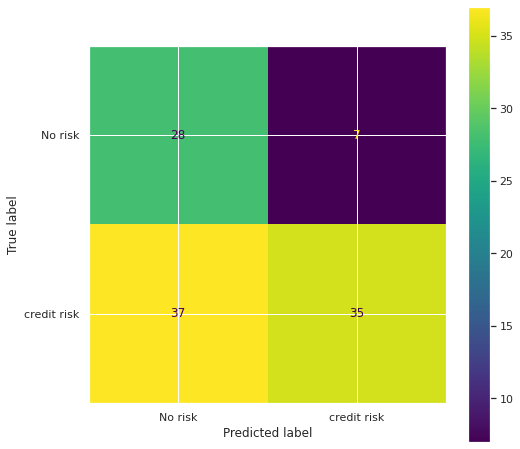

In [ ]:
#below is the confusion matrix at default threshold
plot_confusion_matrix(gridsearch.best_estimator_, X_test, y_test,display_labels = ['No risk', 'credit risk'])


#compute classification score 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.80      0.56        35
           1       0.83      0.49      0.61        72

    accuracy                           0.59       107
   macro avg       0.63      0.64      0.59       107
weighted avg       0.70      0.59      0.60       107



##cost of TP (assuming $10 for each false positive)

In [ ]:
#we can calculate the cost of the fp and fn for the company X
def compute_cost(cost_fn = 0, cost_fp = 10):
    tn, fn, fp, tp = confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_proba]).ravel()
    return (cost_fn * fn + cost_fp * fp)

print('The cost of allowing false positive in your model is $',compute_cost())

The cost of allowing false positive in your model is $ 480


#feature importance

In [ ]:
best_values  = gridsearch.best_estimator_[3][1].feature_importances_

In [ ]:
best_columns = X_train.columns[SelectKBest(k = 3).fit(X_train, y_train).get_support()]

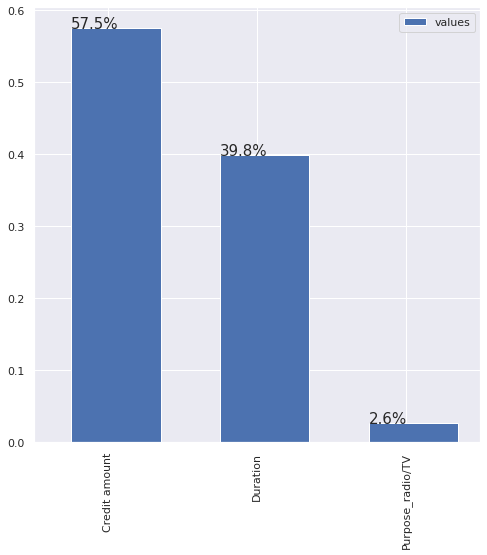

In [ ]:
feature_df = pd.DataFrame({'columns': best_columns, 'values': best_values}).sort_values(by = 'values', ascending = False)
ax = feature_df.set_index(columns).plot.bar();

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.1%}'.format(height/1), (x, y + height )).set_fontsize(15) 


#Dataframe of predicted and observed values 

In [ ]:
df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_final.head()

,Actual,Predicted
311,1,0
395,1,0
431,0,0
905,1,1
478,1,0


In [ ]:
 df_final['residual'] = [1 if x == y else 0 for x, y in list(zip(df_final['Actual'], df_final['Predicted']))]


In [ ]:
df_final.head()

,Actual,Predicted,residual
311,1,0,0
395,1,0,0
431,0,0,1
905,1,1,1
478,1,0,0


##Plot of residual 

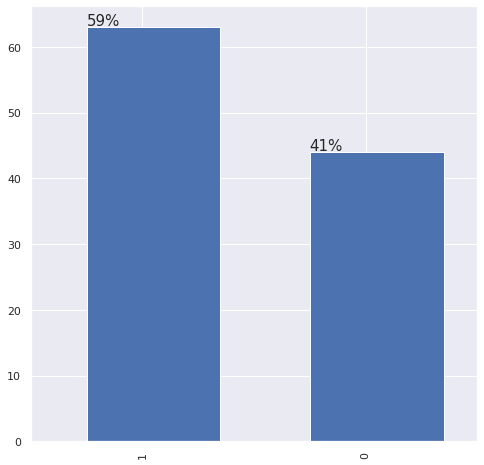

In [ ]:
ax = df_final['residual'].value_counts().plot.bar();

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    
    i.set_width(.60)
    
    x, y = i.get_xy()
    
    ax.annotate('{:.0%}'.format(height/107), (x, y + height + 0.3)).set_fontsize(15) 


#conclusion

From the above, it shows that randomforest predicted 51% of the classes correctly and 41% incorrectly. 
The model can be improved upong by either adding new observations and/or tuning the hyperparameters. 
